# =========================================================
# IRIS FLOWER CLASSIFICATION — Full Project
# by Tannu
# ID: cxiai202511230
# =========================================================


## Description :
 <font color = 'red'>
 The Iris dataset is one of the most widely used datasets in machine learning and pattern recognition.
This project focuses on building a classification model that can automatically identify the species of an iris flower based on the measurements of its sepals and petals.
The project demonstrates the complete machine learning pipeline — from data exploration to model evaluation.</font>

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Key Features
- `Sepal Measurements` : Analyze sepal length and sepal width to observe variations across species.
- `Species Differentiation`: Identify distinct characteristics separating Setosa, Versicolor, and Virginica.
- `Feature Relationships`: Explore correlations and pairwise relationships between sepals and petals.
- `Data Visualization`: Utilize scatter plots, pair plots, and boxplots for visual insights into the dataset.

Feature Descriptions & Unique Values
- `Sepal Length (cm)`: Length of the sepal for each flower.
- `Sepal Width (cm)`: Width of the sepal for each flower.
- `Petal Length (cm)`: Length of the petal for each flower.
- `Petal Width (cm)`: Width of the petal for each flower.
- `Species`: The species of the iris flower.

Categorical feature with three unique classes:
- Setosa

- Versicolor

- Virginica

# ------------------------------------------------------------
# 1. Load Dataset
# -------------------------------------------------------------


In [154]:
iris = load_iris()
X = iris.data                 
Y = iris.target               

# Creating DataFrame
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = iris.target_names[Y]
print("Dataset Shape:", iris_df.shape)
iris_df

Dataset Shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# ------------------------------------------------------------
# 2. Exploratory Data Analysis (EDA)
# ------------------------------------------------------------


<Axes: xlabel='species'>

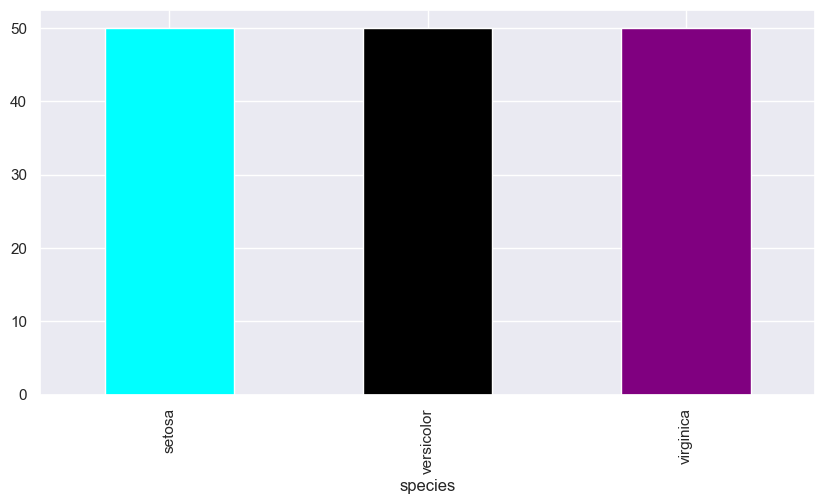

In [156]:
iris_df['species'].value_counts().plot(kind='bar',color=["aqua","black","purple"])


- ## Pairplot to visualize feature relationships


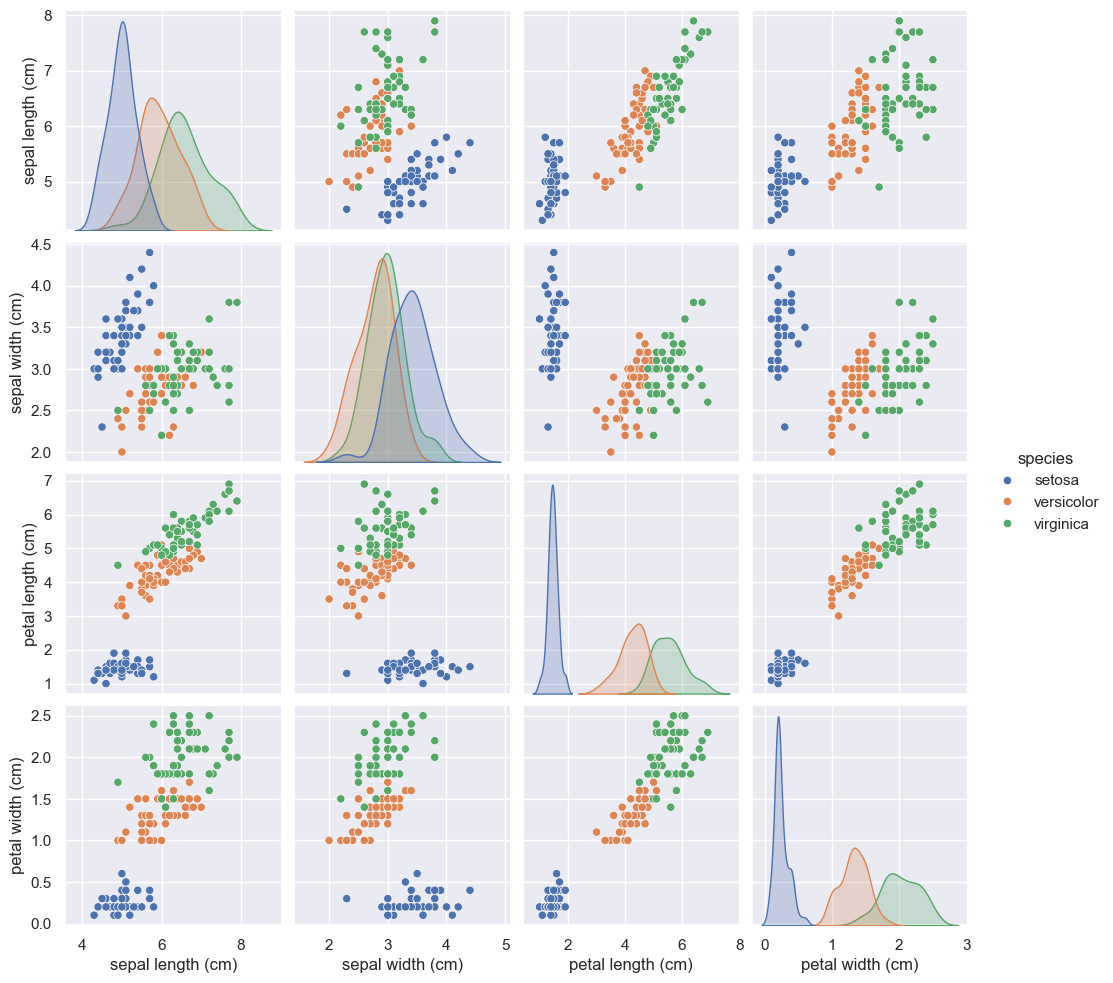

In [82]:
sns.pairplot(iris_df, hue="species")
plt.show()

- ## Histograms

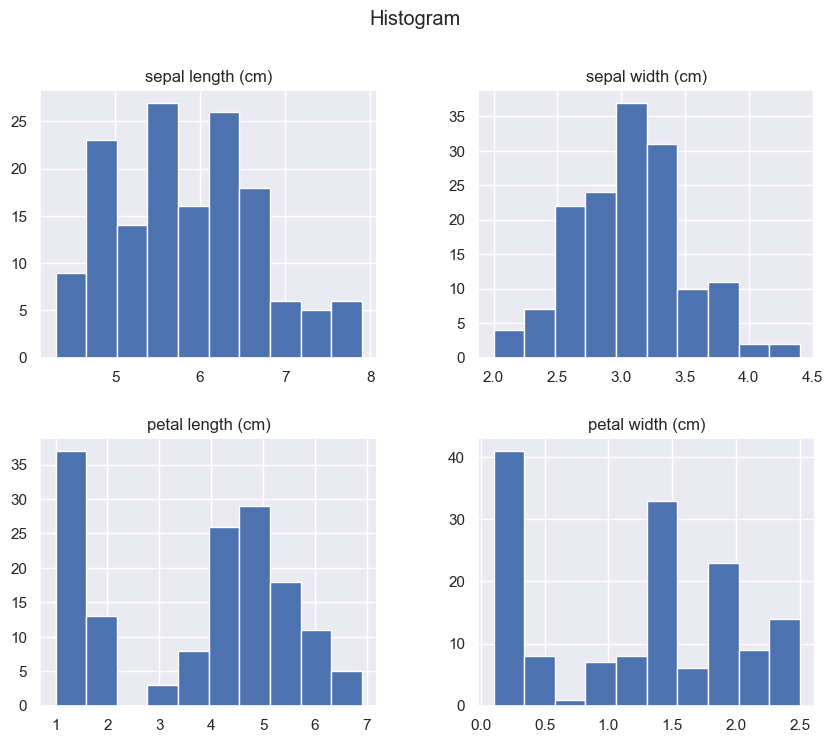

In [32]:
iris_df.hist(figsize=(10,8))
plt.suptitle("Histogram")
plt.show()

- ## Box-plot

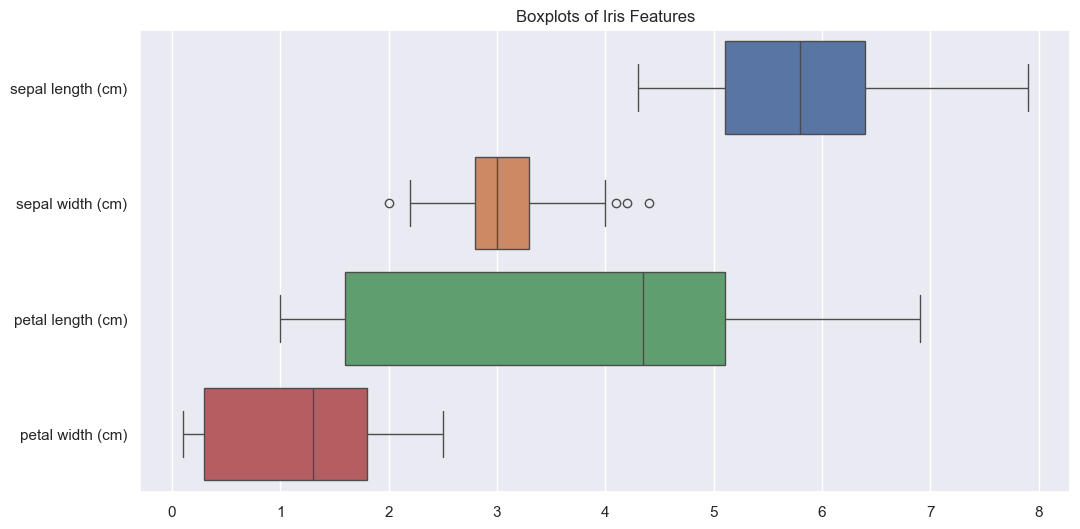

In [84]:
plt.figure(figsize=(12,6))
sns.boxplot(data=iris_df, orient="h")
plt.title("Boxplots of Iris Features")
plt.show()

# ------------------------------------------------------------
# 3. Train-Test Split
# ------------------------------------------------------------


- ## Feature Scaling (Normalization)

In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def normalize(X):
        print("Mean and Standard Deviation Before")
        print(X.mean(axis=0), X.std(axis=0))

        sc=StandardScaler()
        XScaled = sc.fit_transform(X)
     
        print("Mean and Standard Deviation After")
        print(XScaled.mean(axis=0).round(4), XScaled.std(axis=0))
        return XScaled

XScaled = normalize(X)

Mean and Standard Deviation Before
[5.84333333 3.05733333 3.758      1.19933333] [0.82530129 0.43441097 1.75940407 0.75969263]
Mean and Standard Deviation After
[-0. -0. -0. -0.] [1. 1. 1. 1.]


In [145]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# ------------------------------------------------------------
# 4. Machine Learning Models

# ------------------------------------------------------------


- ## Model Training


================ Logistic Regression ================
Accuracy: 0.7666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.57      0.50      0.53         8
           2       0.60      0.75      0.67         8

    accuracy                           0.77        30
   macro avg       0.72      0.73      0.72        30
weighted avg       0.78      0.77      0.77        30



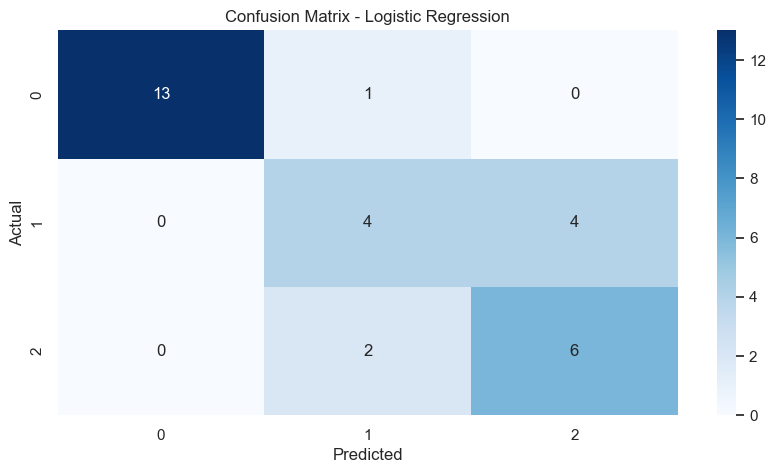


================ K-Nearest Neighbors ================
Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.60      0.75      0.67         8
           2       0.71      0.62      0.67         8

    accuracy                           0.80        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.82      0.80      0.80        30



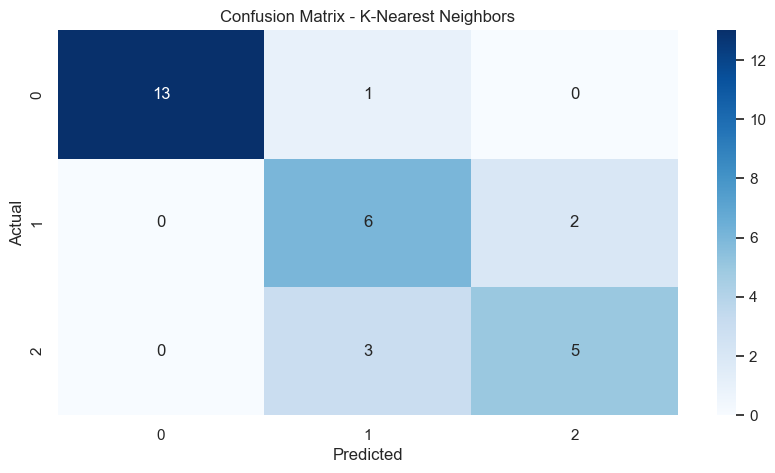


================ Decision Tree ================
Accuracy: 0.7666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.57      0.50      0.53         8
           2       0.60      0.75      0.67         8

    accuracy                           0.77        30
   macro avg       0.72      0.73      0.72        30
weighted avg       0.78      0.77      0.77        30



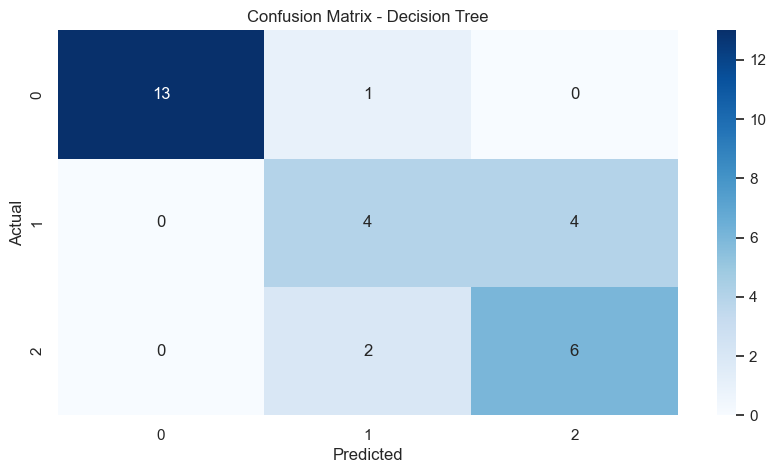

In [147]:
feature_names = iris.feature_names
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=4)
}


for name, model in models.items():
    print(f"\n================ {name} ================")
    
    y_pred = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(Y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))
    
    # Confusion Matrix Heatmap
    cm = confusion_matrix(Y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


- ## Decision Tree Visualization

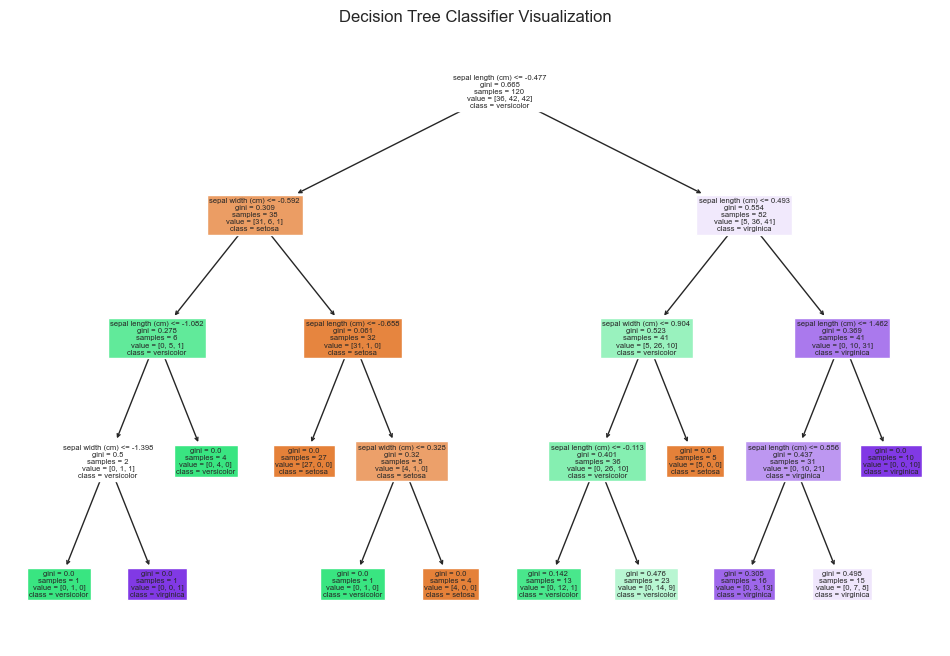

In [148]:
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=feature_names, class_names=iris.target_names)
plt.title("Decision Tree Classifier Visualization")
plt.show()

- ## Decision Boundary Visualization

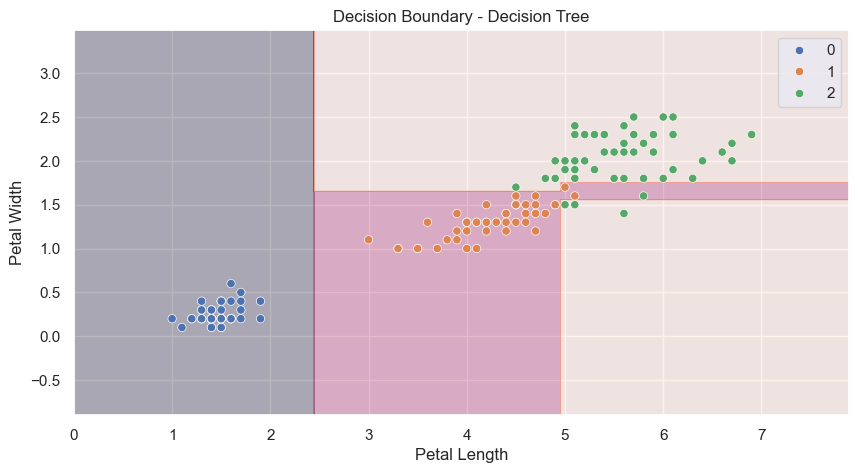

In [150]:

# Petal Length & Petal Width
X_vis = iris_df.iloc[:, [2, 3]].values
Y_vis = Y

dt2 = DecisionTreeClassifier(max_depth=4)
dt2.fit(X_vis, Y_vis)

x_min, x_max = X_vis[:,0].min() - 1, X_vis[:,0].max() + 1
y_min, y_max = X_vis[:,1].min() - 1, X_vis[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


Z = dt2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=Y_vis, palette="deep")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision Boundary - Decision Tree")
plt.show()
